In [7]:
# 📚 Import libraries
import pandas as pd
import plotly.express as px

# 📄 Load your data
df = pd.read_csv('unicef_indicator_2.csv')  # <-- change this to your file path

# 🧹 Basic cleanup (if needed)
# Make sure alpha_3_code exists and obs_value is numeric
df = df.dropna(subset=['alpha_3_code', 'obs_value'])

# 🌍 Create choropleth map
fig = px.choropleth(
    df,
    locations="alpha_3_code",            # ISO-3 codes for countries
    color="obs_value",                   # sanitation % (higher = lighter/darker color)
    hover_name="country",                # show country name on hover
    color_continuous_scale="Viridis",     # you can try 'Plasma', 'Cividis', 'Turbo' etc.
    range_color=(0, 100),                 # assuming obs_value is 0-100%
    title="Percentage of Schools with Improved Sanitation Services"
)

# ✨ Update layout for better visuals
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    coloraxis_colorbar=dict(title="Sanitation (%)")
)

plt.savefig('sanitation_map.png', bbox_inches='tight')  # <-- Save the figure

# 📈 Show the figure
fig.show()


<Figure size 640x480 with 0 Axes>

In [8]:
# 📄 Load your data
df = pd.read_csv('unicef_indicator_2.csv')   # <-- update path if needed

# 🧹 Filter for Limited Sanitation
# Assuming "indicator" column has info like 'Limited Sanitation Services'
limited_sanitation_df = df[df['indicator'].str.contains('Limited', case=False, na=False)]

# 🧹 Clean data: Keep necessary columns and drop missing obs_values
limited_sanitation_df = limited_sanitation_df.dropna(subset=['obs_value', 'time_period'])

# 📈 Group by Year: Average sanitation value across countries
trend_df = limited_sanitation_df.groupby('time_period')['obs_value'].mean().reset_index()

# 📊 Plot the trend line
fig = px.line(
    trend_df,
    x="time_period",
    y="obs_value",
    title="Trend of Schools with Limited Sanitation Services Over the Years",
    markers=True,
    labels={"time_period": "Year", "obs_value": "Limited Sanitation (%)"}
)

# ✨ Optional: Smooth the line if you want
# fig.update_traces(line_shape='spline')
plt.savefig('sanitation_trend.png', bbox_inches='tight')  # <-- Save the figure

fig.show()


<Figure size 640x480 with 0 Axes>

In [10]:
# 📚 Import libraries
import pandas as pd
import plotly.express as px

# 📄 Load data
df = pd.read_csv('unicef_metadata.csv')  # <-- Update path

# 🌍 World map colored by Life Expectancy
fig = px.choropleth(
    df,
    locations="alpha_3_code",  # or use 'country' if ISO codes aren't available
    color="Life expectancy at birth, total (years)",
    hover_name="country",
    animation_frame="year",  # 🎥 Optional: See changes over time!
    color_continuous_scale="Viridis",
    title="Life Expectancy at Birth Across Countries"
)
plt.savefig('gdp_life_bar_chart.png', bbox_inches='tight')

fig.show()


<Figure size 640x480 with 0 Axes>

In [12]:
# 📚 Import libraries
import pandas as pd
import plotly.express as px

# 📄 Load data
df = pd.read_csv('unicef_metadata.csv')
# 🧹 Clean: Drop missing values
df_clean = df.dropna(subset=["GDP growth (annual %)"])

# 📊 Line Plot: GDP Growth over Years for Top Countries
top_countries = ['United States', 'China', 'India', 'Germany', 'Japan']  # Example, change as needed

fig = px.line(
    df_clean[df_clean['country'].isin(top_countries)],
    x="year",
    y="GDP growth (annual %)",
    color="country",
    markers=True,
    title="GDP Growth (Annual %) Trend Over Years for Selected Countries",
    labels={"year": "Year", "GDP growth (annual %)": "GDP Growth (%)"}
)
plt.savefig('economic_map.png', bbox_inches='tight')
fig.show()


<Figure size 640x480 with 0 Axes>

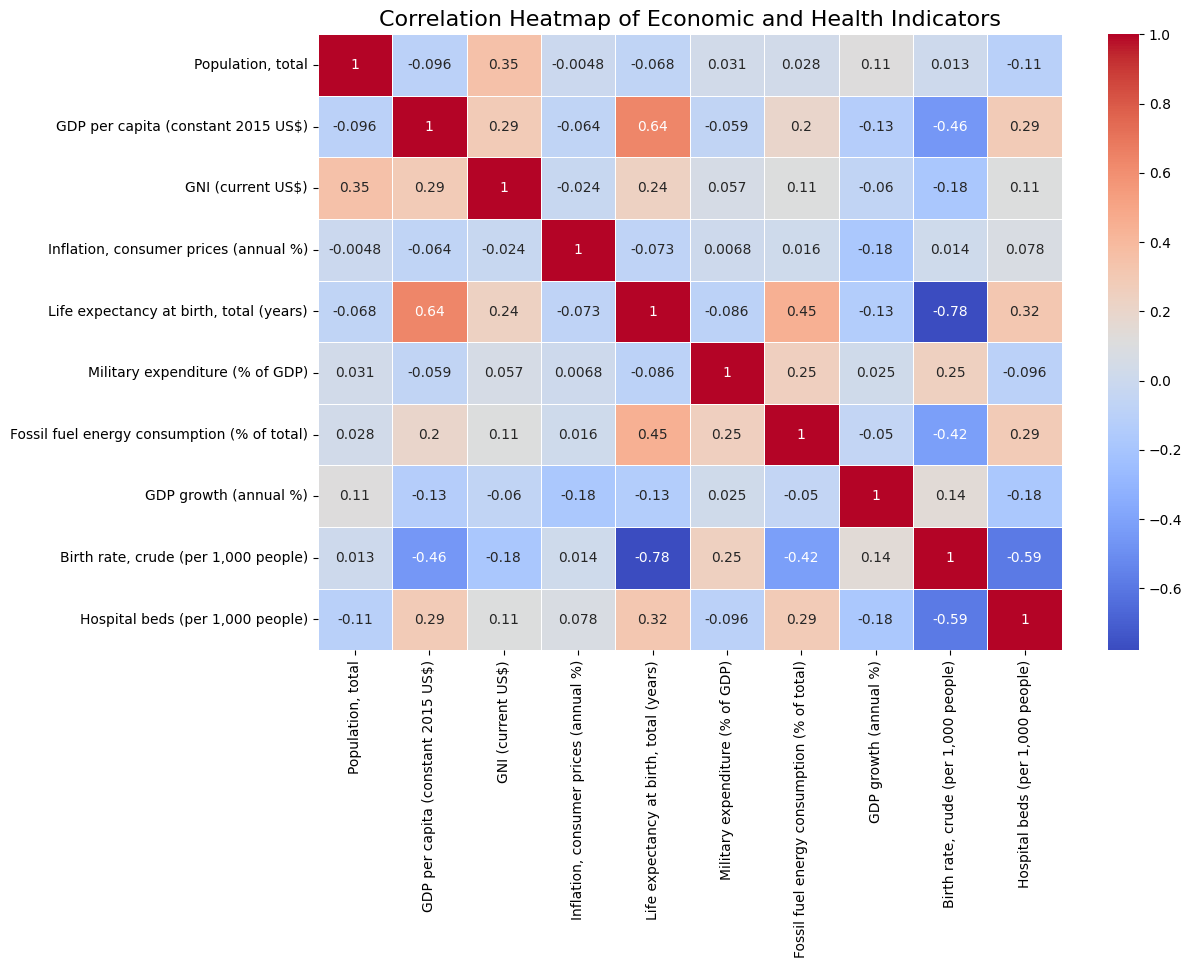

In [11]:
# 📚 Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📄 Load data
df = pd.read_csv('unicef_metadata.csv')

# 🧹 Select only numerical columns you care about
numerical_cols = [
    "Population, total",
    "GDP per capita (constant 2015 US$)",
    "GNI (current US$)",
    "Inflation, consumer prices (annual %)",
    "Life expectancy at birth, total (years)",
    "Military expenditure (% of GDP)",
    "Fossil fuel energy consumption (% of total)",
    "GDP growth (annual %)",
    "Birth rate, crude (per 1,000 people)",
    "Hospital beds (per 1,000 people)"
]

# Subset and clean data
df_num = df[numerical_cols].dropna()

# 🔥 Compute correlation matrix
corr_matrix = df_num.corr()

# 🎨 Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Economic and Health Indicators', fontsize=16)
plt.savefig('correlation_heatmap.png', bbox_inches='tight')

plt.show()


In [14]:
!apt-get install -y apt-transport-https software-properties-common
!wget -qO - https://apt.quarto.org/linux/quarto-archive.key | sudo tee /etc/apt/trusted.gpg.d/quarto.asc
!echo "deb [signed-by=/etc/apt/trusted.gpg.d/quarto.asc] https://apt.quarto.org/linux/debian stable main" | sudo tee /etc/apt/sources.list.d/quarto.list
!sudo apt-get update
!sudo apt-get install quarto

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
software-properties-common is already the newest version (0.99.22.9).
The following NEW packages will be installed:
  apt-transport-https
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,510 B of archives.
After this operation, 170 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 apt-transport-https all 2.4.13 [1,510 B]
Fetched 1,510 B in 0s (7,365 B/s)
Selecting previously unselected package apt-transport-https.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .../apt-transport-https_2.4.13_all.deb ...
Unpacking apt-transport-https (2.4.13) ...
Setting up apt-transport-https (2.4.13) ...
deb [signed-by=/etc/apt/trusted.gpg.d/quarto.asc] https://apt.quarto.org/linux/debian stable main
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
G

In [21]:
# 📚 Import libraries
import os

# ✨ Quarto YAML Header
yaml_header = """
---
format:
  html:
    embed-resources: true
    code-fold: true
theme: journal
---
"""

# ✨ Generate Quarto markdown content
quarto_content = f"""{yaml_header}

## World Sanitation and Economic Indicators Report

This report presents visualizations analyzing sanitation access in schools and economic indicators across countries.

### Visualisation 1: World Map of Schools with Sanitation
![Sanitation Map](sanitation_map.png)

### Visualisation 2: Trend Line of School Sanitation over Years
![Trend Line](sanitation_trend.png)

### Visualisation 3: Economic Indicator Map
![Economic Map](economic_map.png)

### Visualisation 4: GDP vs Life Expectancy (Bar Chart)
![Bar Chart](gdp_life_bar_chart.png)

### Visualisation 5: Correlation Heatmap
![Heatmap](correlation_heatmap.png)

"""

# ✨ Write to Quarto markdown (.qmd) file
with open('my_final_report.qmd', 'w') as file:
    file.write(quarto_content)

print("✅ Quarto markdown file generated successfully! Render it using Quarto to create the final HTML report.")


✅ Quarto markdown file generated successfully! Render it using Quarto to create the final HTML report.
